# Introduction

The Sickle Cell Dataset is the very first Uganda Based Data Collected of Its Kind. We are excited to have been among the first to interact with it. This Notebook shows how we trained a model to classify the Images. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
sample_image = "/kaggle/input/sickle-cell-disease-dataset/Positive/Labelled/1.jpg"


In [3]:
image = plt.imread(sample_image)
print(image.shape)

(1028, 1000, 3)


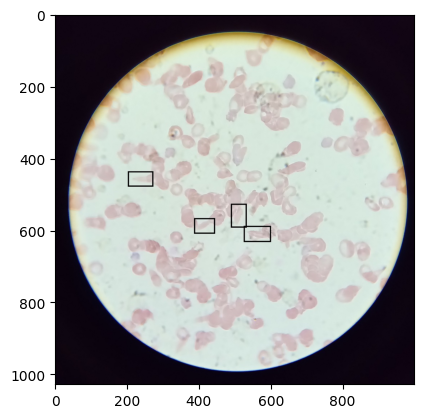

In [4]:
plt.imshow(image)

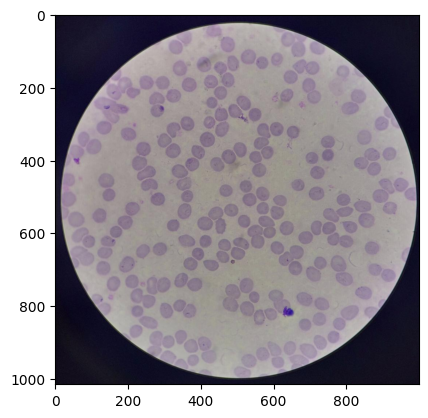

In [5]:
neg_image = plt.imread("/kaggle/input/sickle-cell-disease-dataset/Negative/Clear/1.jpg")
plt.imshow(neg_image)

In [6]:
import os

negative_imgs = len(os.listdir("/kaggle/input/sickle-cell-disease-dataset/Negative/Clear"))
positive_imgs = len(os.listdir("/kaggle/input/sickle-cell-disease-dataset/Positive/Labelled"))

print("total images = ", (negative_imgs + positive_imgs))

total images =  569


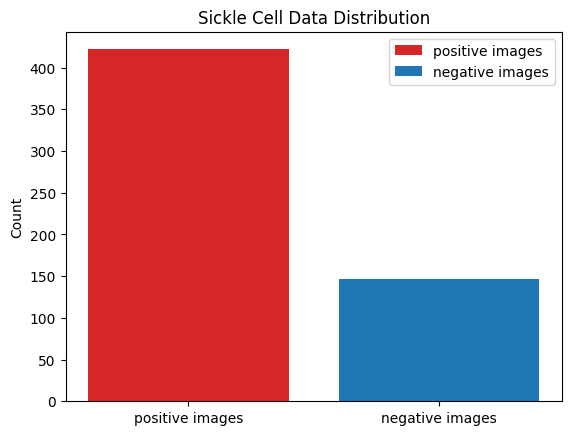

In [7]:
fig, ax = plt.subplots()

fruits = ['positive images', 'negative images']
counts = [positive_imgs, negative_imgs]
bar_labels = ['positive images', 'negative images']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Count')
ax.set_title('Sickle Cell Data Distribution')
ax.legend()


In [8]:
data_df = pd.DataFrame(columns = ["Image dir", "Label"])

In [9]:
positive_img_dir = "/kaggle/input/sickle-cell-disease-dataset/Positive/Labelled"
negative_img_dir = "/kaggle/input/sickle-cell-disease-dataset/Negative/Clear"

In [10]:
import os
import re
import cv2

Images = []
Labels = []

#append in the  postive Images
for file_dir, _, files in os.walk(positive_img_dir):
    for file in files:
        img_file = os.path.join(file_dir, file)
        img = cv2.imread(img_file)
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(1)

In [11]:
#append in the negative Images
for file_dir, _, files in os.walk(negative_img_dir):
    for file in files:
        img_file = os.path.join(file_dir, file)
        img = cv2.imread(img_file)
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(0)

In [12]:
Images = np.array(Images)

Images.shape

(569, 255, 255, 3)

Text(0.5, 1.0, 'Postive')

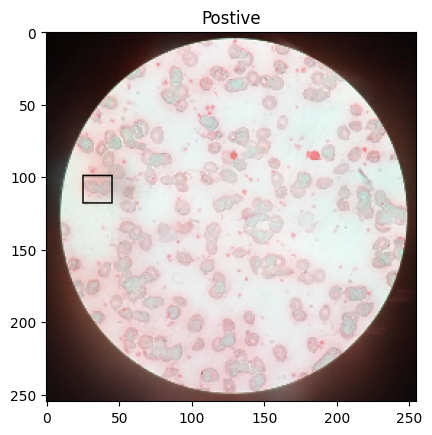

In [13]:
sample = Images[0]

plt.imshow(sample)
plt.title("Postive")

Text(0.5, 1.0, 'Negative')

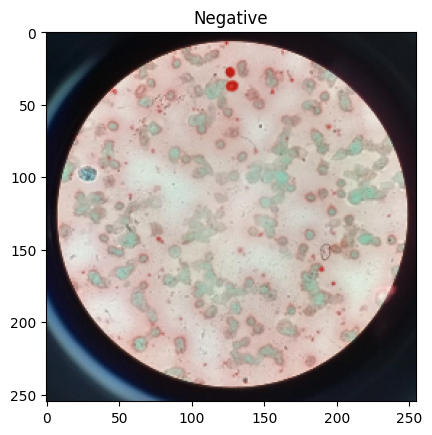

In [14]:
sample = Images[-1]
plt.imshow(sample)
plt.title("Negative")

# Train the models

In [15]:
X = Images / 255 #scale the data
y = Labels

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X, np.array(y), stratify = np.array(y),
                                                    random_state = 42,
                                                    shuffle = True, test_size = 0.2)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((455, 255, 255, 3), (114, 255, 255, 3), (455,), (114,))

In [18]:
np.unique(train_y, return_counts = True) , np.unique(test_y, return_counts = True)

((array([0, 1]), array([118, 337])), (array([0, 1]), array([29, 85])))

# Logistic Regression

Wen dealing with the normal ML models, we have to ensure the data is 2 dimensional, so the first step is to reshape the data to a 2d format

In [19]:
from sklearn.linear_model import LogisticRegression

train_X_flattened = train_X.reshape(len(train_X), -1)
test_X_flattened = test_X.reshape(len(test_X), -1)

In [20]:
train_X_flattened.shape

(455, 195075)

In [21]:
train_y.shape

(455,)

In [22]:
lr = LogisticRegression(random_state = 42).fit(train_X_flattened, train_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [24]:
def get_score(y_pred, y_true):
    print("Accuracy score - ", accuracy_score(y_pred, y_true))
    print("Precision score - ", precision_score(y_pred, y_true))
    print("Recall score - ", recall_score(y_pred, y_true))
    print("f1 score - ", f1_score(y_pred, y_true))
    print("----------  Classification Report   -------")
    print(classification_report(y_pred, y_true))
    
    matrix = confusion_matrix(y_pred, y_true)
    sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d')

In [25]:
pred = lr.predict(train_X_flattened)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



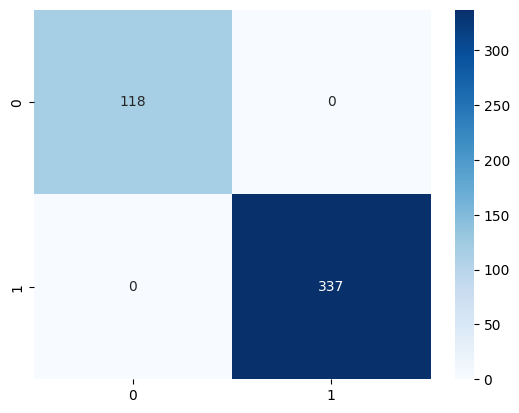

In [26]:
get_score(pred, train_y)

In [27]:
pred = lr.predict(test_X_flattened)

Accuracy score -  0.7982456140350878
Precision score -  0.8470588235294118
Recall score -  0.8780487804878049
f1 score -  0.8622754491017964
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.66      0.59      0.62        32
           1       0.85      0.88      0.86        82

    accuracy                           0.80       114
   macro avg       0.75      0.74      0.74       114
weighted avg       0.79      0.80      0.80       114



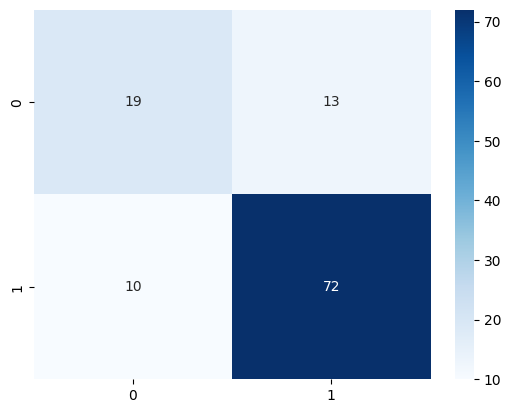

In [28]:
get_score(pred, test_y)

# Ridge Classifier

In [29]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(random_state = 42).fit(train_X_flattened, train_y)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



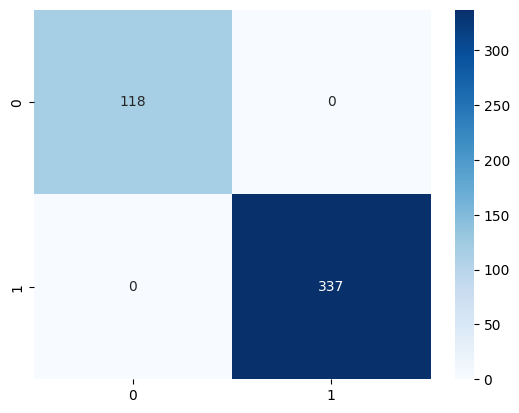

In [30]:
get_score(ridge.predict(train_X_flattened), train_y)

Accuracy score -  0.7719298245614035
Precision score -  0.8117647058823529
Recall score -  0.8734177215189873
f1 score -  0.8414634146341463
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.66      0.54      0.59        35
           1       0.81      0.87      0.84        79

    accuracy                           0.77       114
   macro avg       0.73      0.71      0.72       114
weighted avg       0.76      0.77      0.77       114



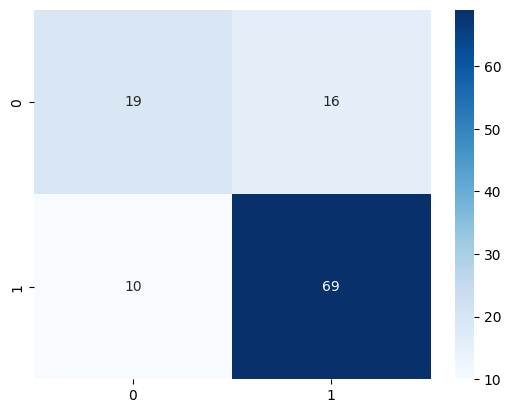

In [31]:
get_score(ridge.predict(test_X_flattened), test_y)

# SVM (Kernel Trick)

In [32]:
from sklearn.svm import SVC

svc = SVC(random_state = 42).fit(train_X_flattened, train_y)

Accuracy score -  0.7406593406593407
Precision score -  1.0
Recall score -  0.7406593406593407
f1 score -  0.851010101010101
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.74      0.85       455

    accuracy                           0.74       455
   macro avg       0.50      0.37      0.43       455
weighted avg       1.00      0.74      0.85       455



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


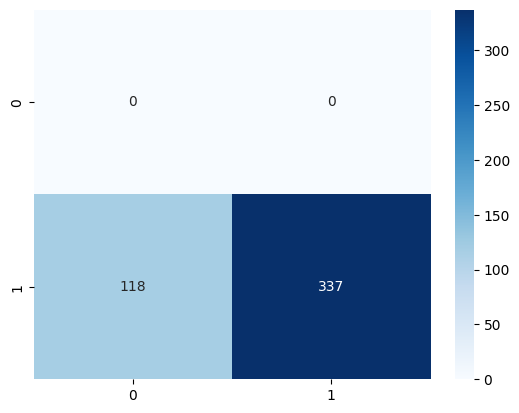

In [33]:
get_score(svc.predict(train_X_flattened), train_y)

Accuracy score -  0.7456140350877193
Precision score -  1.0
Recall score -  0.7456140350877193
f1 score -  0.8542713567839196
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.85       114

    accuracy                           0.75       114
   macro avg       0.50      0.37      0.43       114
weighted avg       1.00      0.75      0.85       114



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


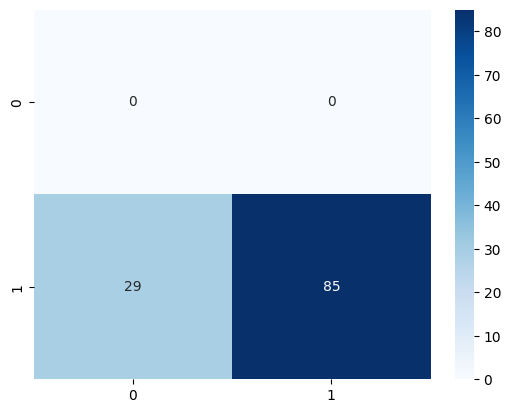

In [34]:
get_score(svc.predict(test_X_flattened), test_y)

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42).fit(train_X_flattened, train_y)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



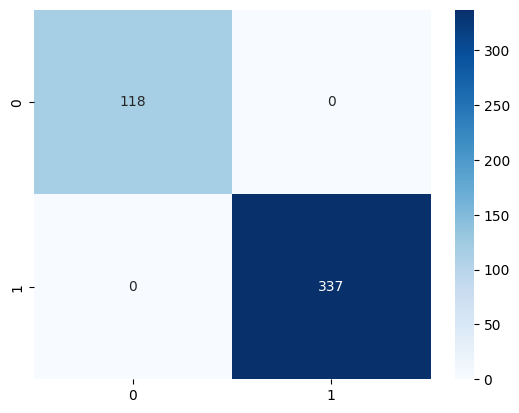

In [36]:
get_score(forest.predict(train_X_flattened), train_y)

Accuracy score -  0.7807017543859649
Precision score -  0.9647058823529412
Recall score -  0.7884615384615384
f1 score -  0.8677248677248677
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.24      0.70      0.36        10
           1       0.96      0.79      0.87       104

    accuracy                           0.78       114
   macro avg       0.60      0.74      0.61       114
weighted avg       0.90      0.78      0.82       114



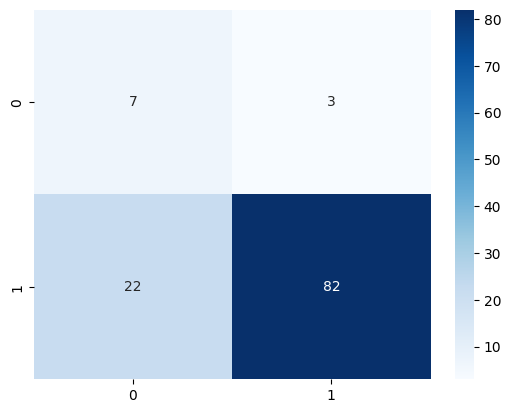

In [37]:
get_score(forest.predict(test_X_flattened), test_y)

# Extra Trees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

xtree = ExtraTreesClassifier(random_state = 42).fit(train_X_flattened, train_y)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



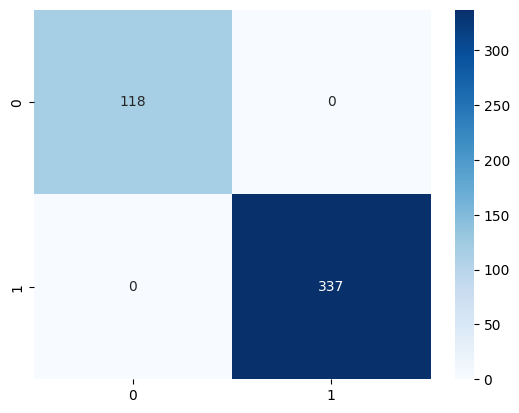

In [39]:
get_score(xtree.predict(train_X_flattened), train_y)

Accuracy score -  0.8333333333333334
Precision score -  0.9647058823529412
Recall score -  0.8367346938775511
f1 score -  0.8961748633879782
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.45      0.81      0.58        16
           1       0.96      0.84      0.90        98

    accuracy                           0.83       114
   macro avg       0.71      0.82      0.74       114
weighted avg       0.89      0.83      0.85       114



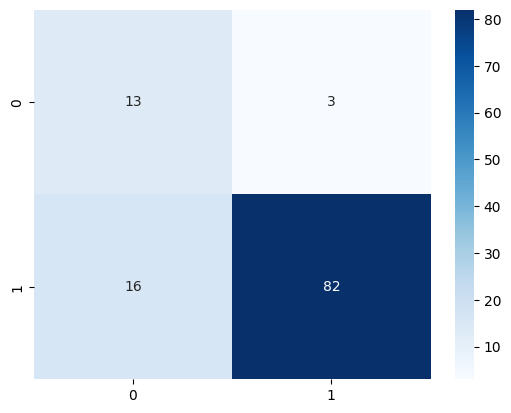

In [40]:
get_score(xtree.predict(test_X_flattened), test_y)

# CNN Model

In [41]:
from tensorflow import keras

2024-06-24 18:36:50.213376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 18:36:50.213490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 18:36:50.338629: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [42]:
# Importing all necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model

img_width, img_height = 255, 255
input_shape = (img_width, img_height, 3)

In [43]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,936,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949,185 (15.06 MB)

 Trainable params: 3,949,185 (15.06 MB)

 Non-trainable params: 0 (0.00 B)

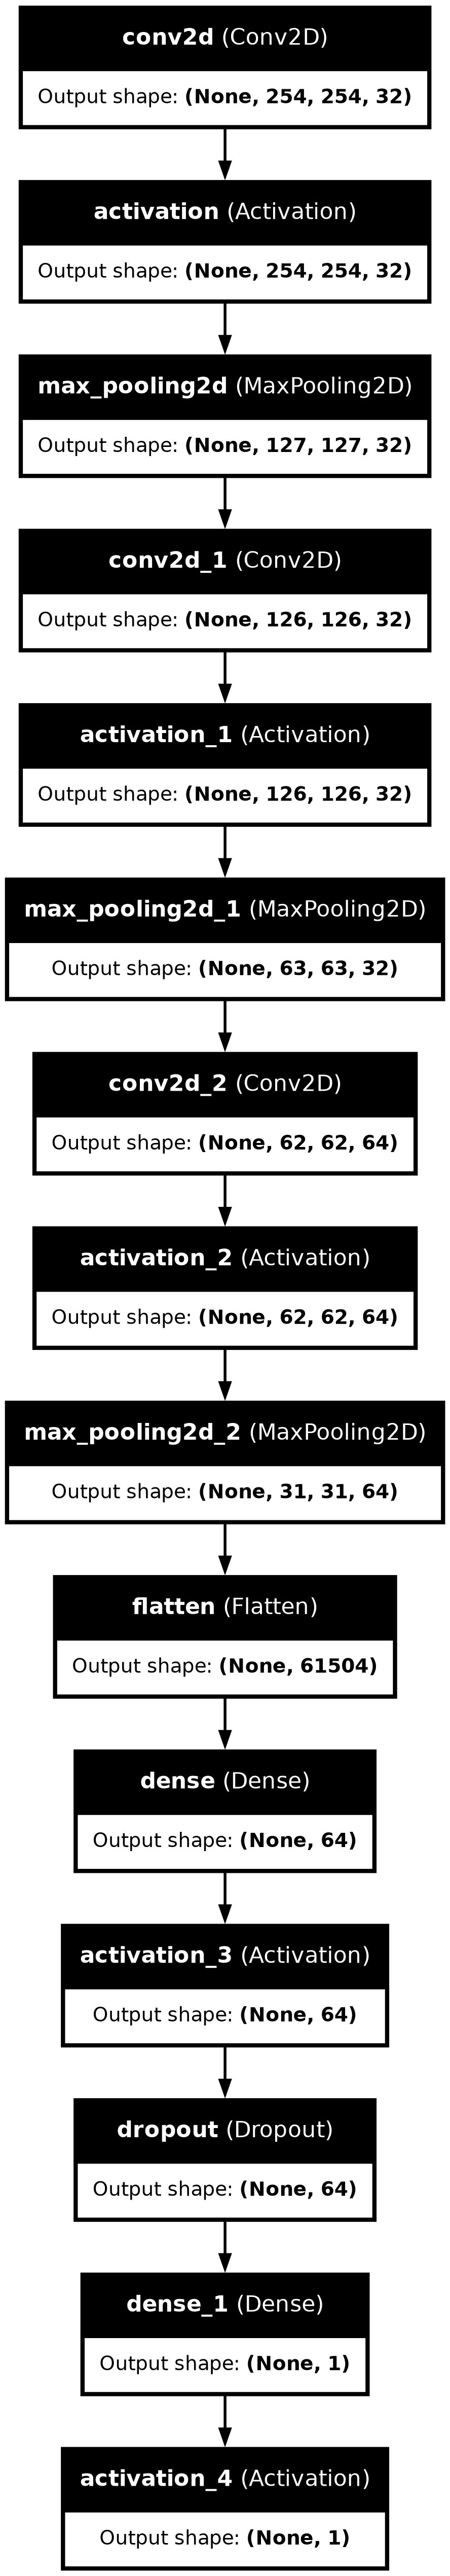

In [45]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
# Add a callback to avoid overfitting

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = "best_model.keras",
    monitor='val_accuracy',
    save_best_only=True
)

In [48]:
history = model.fit(train_X, train_y, validation_data = (test_X, test_y),
          epochs = 20, callbacks = [model_checkpoint])

Epoch 1/20
 7/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5733 - loss: 1.1841

I0000 00:00:1719254230.035334      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.6006 - loss: 1.0493 - val_accuracy: 0.7456 - val_loss: 0.5493
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7215 - loss: 0.6081 - val_accuracy: 0.7456 - val_loss: 0.5438
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7342 - loss: 0.6000 - val_accuracy: 0.7456 - val_loss: 0.5307
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7430 - loss: 0.5907 - val_accuracy: 0.7456 - val_loss: 0.4887
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7405 - loss: 0.4901 - val_accuracy: 0.7544 - val_loss: 0.3428
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8078 - loss: 0.3366 - val_accuracy: 0.9649 - val_loss: 0.1857
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8272 - loss: 0.2358 - val_accuracy: 1.0000 - val_loss: 0.1268
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9253 - loss: 0.1578 - val_accuracy: 1.0000 - val_loss: 

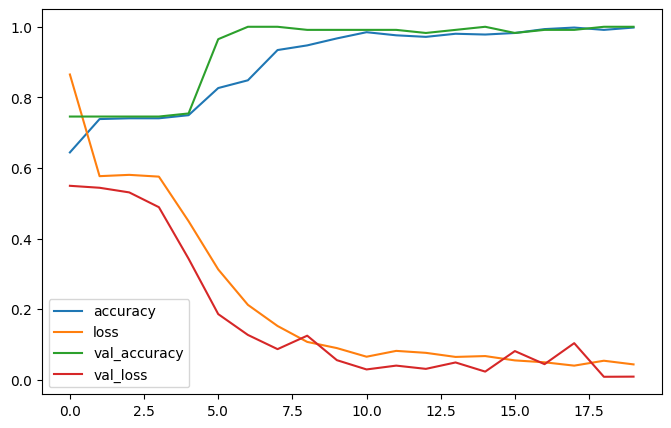

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [50]:
best_model = keras.models.load_model("/kaggle/working/best_model.keras")

# Test the model

In [51]:
predictions = best_model.predict(test_X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step


In [52]:
predictions = np.round(predictions)

In [53]:
y_pred = model.predict(train_X)
y_pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


array([[0.01979915],
       [1.        ],
       [1.        ],
       [0.02825858],
       [1.        ],
       [0.99999404],
       [1.        ],
       [0.99953204],
       [0.004551  ],
       [1.        ],
       [1.        ],
       [0.0343836 ],
       [1.        ],
       [0.01795081],
       [1.        ],
       [0.02859307],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.01163885],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.01251745],
       [1.        ],
       [0.0118515 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       118
         1.0       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



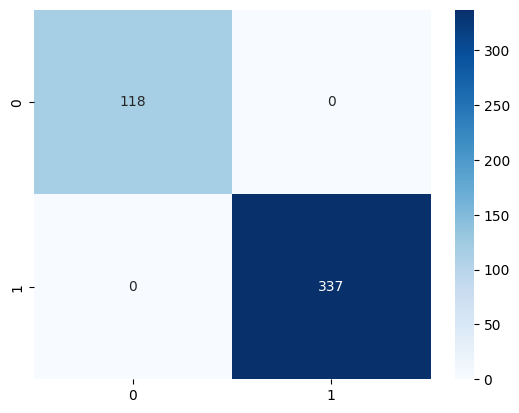

In [54]:
y_pred = np.round(y_pred)
get_score(y_pred, train_y)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        85

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



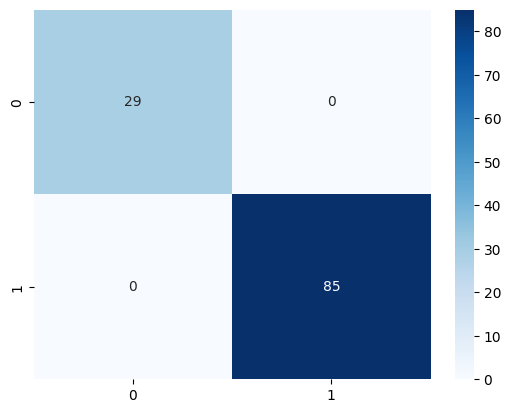

In [55]:
get_score(predictions, test_y)